In [10]:
# setup & dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

base_url="https://api.rawg.io/api/"

In [2]:
# make a dataframe of all parent platforms and the number of games they have
platform_id=[]
platform_name=[]
platform_gamecount=[]

platforms=requests.get(base_url+"platforms/lists/parents").json()
for i in range(len(platforms["results"])):
    platform_id.append(platforms["results"][i]["id"])
    platform_name.append(platforms["results"][i]["name"])
    game_count=0
    for j in range(len(platforms["results"][i]["platforms"])):
        game_count=game_count+platforms["results"][i]["platforms"][j]["games_count"]
    platform_gamecount.append(game_count)
    
platform_df=pd.DataFrame(
    {
        "ID" : platform_id,
        "name" : platform_name,
        "number of games" : platform_gamecount
    }
)
platform_df=platform_df.sort_values("number of games",ascending=False)
platform_df

,ID,name,number of games
0,1,PC,235327
13,14,Web,89305
3,4,iOS,66387
5,5,Apple Macintosh,55051
6,6,Linux,36691
4,8,Android,30242
7,7,Nintendo,15444
1,2,PlayStation,15316
2,3,Xbox,6686
9,10,Commodore / Amiga,2025


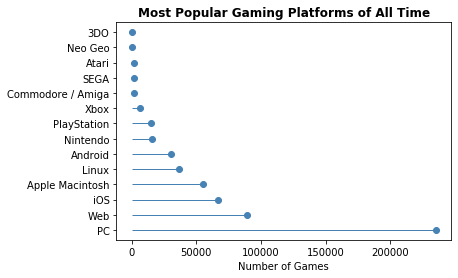

In [3]:
# lollipop plot of most popular gaming platforms of all time
plt.hlines(platform_df["name"], xmin=0, xmax=platform_df["number of games"],linewidth=1,color='steelblue')
plt.plot(platform_df["number of games"], platform_df["name"], "o", color='steelblue')
plt.title("Most Popular Gaming Platforms of All Time",fontweight="bold")
plt.xlabel("Number of Games")
plt.savefig("figures/popular_platforms.png")

In [4]:
# make a dataframe of all game stores and the number of games they have
store_id=[]
store_name=[]
store_gamecount=[]

stores=requests.get(base_url+"stores").json()
for i in range(len(stores["results"])):
    store_id.append(stores["results"][i]["id"])
    store_name.append(stores["results"][i]["name"])
    store_gamecount.append(stores["results"][i]["games_count"])
    
store_df=pd.DataFrame(
    {
        "ID" : store_id,
        "name" : store_name,
        "number of games" : store_gamecount
    }
)

store_df=store_df.sort_values("number of games",ascending=False)
store_df

,ID,name,number of games
8,9,itch.io,261147
3,4,App Store,64861
0,1,Steam,41736
7,8,Google Play,16069
5,6,Nintendo Store,7733
1,3,PlayStation Store,6498
2,2,Xbox Store,3034
4,5,GOG,2700
6,7,Xbox 360 Store,1765
9,11,Epic Games,269


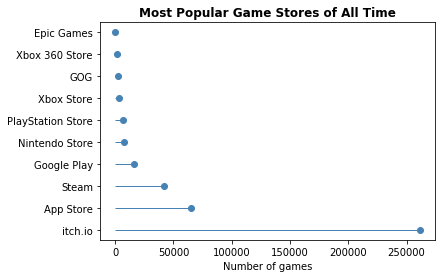

In [5]:
# lollipop plot of most popular game stores of all time
plt.hlines(store_df["name"], xmin=0, xmax=store_df["number of games"], linewidth=1, color='steelblue')
plt.plot(store_df["number of games"], store_df["name"], "o", color='steelblue')
plt.title("Most Popular Game Stores of All Time", fontweight="bold")
plt.xlabel("Number of games")
plt.savefig("figures/popular_stores.png")

In [6]:
# API call for all games released between 2015-2019

game_name=[]
game_id=[]
game_platform_num=[]
game_platform=[]
game_store_num=[]
game_store=[]
game_genre_num=[]
game_genre=[]
game_tag=[]
game_releasedate=[]
game_rating=[]
game_rating_top=[]
game_rating_count=[]
game_metacritic=[]
added_count=[]

count=1
while count:
    url=base_url+"games?dates=2015-01-01,2019-12-31&page="+str(count)
    response=requests.get(url)
    if response.status_code!=200:
        break
    else:
        games=response.json()
        print(f'getting data from {url}')
        for i in range(len(games["results"])):
            try:
                if (len(games["results"][i]["platforms"])>0) & \
                (len(games["results"][i]["stores"])>0) & \
                (len(games["results"][i]["genres"])>0) & \
                (games["results"][i]["rating"]>0) &\
                (games["results"][i]["metacritic"]>0):
                    # game name
                    game_name.append(games["results"][i]["name"])
                    #game id
                    game_id.append(games["results"][i]["id"])
                    # game platform
                    game_platform_num.append(len(games["results"][i]["platforms"]))
                    game_platform_temp=[]
                    for j in range(len(games["results"][i]["parent_platforms"])):
                        game_platform_temp.append(games["results"][i]["parent_platforms"][j]["platform"]["name"])
                    game_platform.append(game_platform_temp)
                    # game store
                    game_store_num.append(len(games["results"][i]["stores"]))
                    game_store_temp=[]
                    for j in range(len(games["results"][i]["stores"])):
                        game_store_temp.append(games["results"][i]["stores"][j]["store"]["name"])
                    game_store.append(game_store_temp)
                    # game genre
                    game_genre_num.append(len(games["results"][i]["genres"]))
                    game_genre_temp=[]
                    for j in range(len(games["results"][i]["genres"])):
                        game_genre_temp.append(games["results"][i]["genres"][j]["name"])
                    game_genre.append(game_genre_temp)
                    # game tag
                    game_tag_temp=[]
                    for j in range(len(games["results"][i]["tags"])):
                        if (games["results"][i]["tags"][j]["language"]=="eng"):
                            game_tag_temp.append(games["results"][i]["tags"][j]["name"])
                    game_tag.append(game_tag_temp)
                    # game release date
                    game_releasedate.append(games["results"][i]["released"])
                    # game rating
                    game_rating.append(games["results"][i]["rating"])
                    game_rating_top.append(games["results"][i]["rating_top"])
                    game_rating_count.append(games["results"][i]["ratings_count"])
                    game_metacritic.append(games["results"][i]["metacritic"])
                    # added-by status
                    added_count.append(games["results"][i]["added_by_status"])
            except:
                continue
        count += 1

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=1
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=2
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=3
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=4
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=5
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=6
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=7
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=8
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=9
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=10
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=11
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=12
g

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=99
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=100
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=101
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=102
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=103
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=104
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=105
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=106
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=107
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=108
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=109
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=196
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=197
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=198
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=199
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=200
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=201
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=202
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=203
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=204
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=205
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=206
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=293
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=294
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=295
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=296
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=297
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=298
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=299
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=300
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=301
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=302
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=303
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=390
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=391
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=392
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=393
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=394
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=395
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=396
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=397
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=398
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=399
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=400
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=487
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=488
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=489
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=490
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=491
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=492
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=493
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=494
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=495
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=496
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=497
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

In [7]:
# create a giant dataframe of all games released between 2015-2019
game_df = pd.DataFrame(
    {
        "name" : game_name,
        "id" : game_id,
        "number of platforms" : game_platform_num,
        "platforms" : game_platform,
        "number of stores" : game_store_num,
        "stores" : game_store,
        "number of genres" : game_genre_num,
        "genres" : game_genre,
        "tags" : game_tag,
        "release date" : game_releasedate,
        "rating" : game_rating,
        "max rating" : game_rating_top,
        "rating count" : game_rating_count,
        "metacritic score" : game_metacritic,
        "added" : added_count
          }
)

# get release month from release date
game_df["month"] = pd.DatetimeIndex(game_df["release date"]).month

game_df.to_csv("csvfiles/game.csv")

game_df

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month
0,The Witcher 3: Wild Hunt,3328,4,"[PC, PlayStation, Xbox, Nintendo]",4,"[Steam, PlayStation Store, Xbox Store, GOG]",3,"[Adventure, Action, RPG]","[Full controller support, Action RPG, Atmosphe...",2015-05-18,4.67,5,3480,93,"{'yet': 559, 'owned': 6148, 'beaten': 2407, 't...",5
1,Life is Strange,3439,9,"[PC, PlayStation, Xbox, iOS, Android, Apple Ma...",7,"[Steam, PlayStation Store, Xbox Store, App Sto...",1,[Adventure],"[Full controller support, Atmospheric, Choices...",2015-01-29,4.10,5,2222,83,"{'yet': 464, 'owned': 6157, 'beaten': 1914, 't...",1
2,Red Dead Redemption 2,28,3,"[PC, PlayStation, Xbox]",4,"[Steam, PlayStation Store, Xbox Store, Epic Ga...",2,"[Adventure, Action]","[In-App Purchases, America, Partial Controller...",2018-10-26,4.56,5,2546,96,"{'yet': 402, 'owned': 4228, 'beaten': 1262, 't...",10
3,DOOM (2016),2454,4,"[PC, PlayStation, Xbox, Nintendo]",4,"[Steam, PlayStation Store, Xbox Store, Nintend...",2,"[Shooter, Action]","[Partial Controller Support, Steam Achievement...",2016-05-13,4.40,5,2178,85,"{'yet': 319, 'owned': 4864, 'beaten': 1524, 't...",5
4,Fallout 4,3070,3,"[PC, PlayStation, Xbox]",3,"[Steam, PlayStation Store, Xbox Store]",2,"[Action, RPG]","[Full controller support, Action RPG, Steam Ac...",2015-11-09,3.75,4,1989,84,"{'yet': 294, 'owned': 4841, 'beaten': 1234, 't...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,AO International Tennis,58354,3,"[PC, PlayStation, Xbox]",3,"[Steam, PlayStation Store, Xbox Store]",1,[Sports],"[Full controller support, Steam Achievements, ...",2018-05-07,3.45,4,11,58,"{'owned': 16, 'beaten': 2, 'toplay': 2, 'dropp...",5
1183,Far Cry 5 - Lost On Mars,319111,3,"[PC, PlayStation, Xbox]",3,"[Steam, PlayStation Store, Xbox Store]",2,"[Adventure, Action]","[Mars, Space, Story, gun, Gravity, laser, lase...",2018-07-17,3.57,5,7,59,"{'yet': 2, 'owned': 5, 'beaten': 7, 'toplay': ...",7
1184,CATS: Crash Arena Turbo Stars (C.A.T.S.),21848,2,"[iOS, Android]",2,"[App Store, Google Play]",3,"[Casual, Arcade, Action]","[Asynchronous Multiplayer, Cute]",2017-04-19,3.79,4,14,78,"{'yet': 1, 'owned': 5, 'beaten': 3, 'dropped':...",4
1185,Card Thief,334,2,"[iOS, Android]",2,"[App Store, Google Play]",2,"[Card, Board Games]","[Stealth, mobile, dungeon, solitaire, unique]",2017-03-19,3.90,4,9,88,"{'yet': 2, 'owned': 4, 'beaten': 2, 'toplay': ...",3


In [8]:
# get game rating by platform
platform_df["rating"]=0
platform_df["rating count"]=0

for i in game_df.index:
    rating=game_df.loc[i,"rating"]*game_df.loc[i,"rating count"]
    rating_count=game_df.loc[i,"rating count"]
    platform=game_df.loc[i,"platforms"]
    for j in platform:
        for k in platform_df.index:
            if platform_df.loc[k,"name"]==j:
                platform_df.loc[k,"rating"]=platform_df.loc[k,"rating"]+float(rating)
                platform_df.loc[k,"rating count"]=platform_df.loc[k,"rating count"]+int(rating_count)

platform_df["avg rating"]=platform_df["rating"]/platform_df["rating count"]

platform_df.to_csv("csvfiles/game_platform.csv")
platform_df

,ID,name,number of games,rating,rating count,avg rating
0,1,PC,235327,777808.28,201159,3.866634
13,14,Web,89305,11192.77,2906,3.851607
3,4,iOS,66387,119092.52,31085,3.831189
5,5,Apple Macintosh,55051,277250.82,72327,3.833296
6,6,Linux,36691,209473.52,54156,3.867965
4,8,Android,30242,78919.93,20658,3.820308
7,7,Nintendo,15444,329738.15,82464,3.998571
1,2,PlayStation,15316,749689.15,191127,3.922466
2,3,Xbox,6686,638645.74,164388,3.884990
9,10,Commodore / Amiga,2025,0.00,0,NaN


In [9]:
# get game rating by game store
store_df["rating"]=0
store_df["rating count"]=0

for i in game_df.index:
    rating=game_df.loc[i,"rating"]*game_df.loc[i,"rating count"]
    rating_count=game_df.loc[i,"rating count"]
    store=game_df.loc[i,"stores"]
    for j in store:
        for k in store_df.index:
            if store_df.loc[k,"name"]==j:
                store_df.loc[k,"rating"]=store_df.loc[k,"rating"]+float(rating)
                store_df.loc[k,"rating count"]=store_df.loc[k,"rating count"]+int(rating_count)

store_df["avg rating"]=store_df["rating"]/store_df["rating count"]

store_df.to_csv("csvfiles/game_store.csv")
store_df

,ID,name,number of games,rating,rating count,avg rating
8,9,itch.io,261147,21468.30,5315,4.039191
3,4,App Store,64861,141941.67,37157,3.820052
0,1,Steam,41736,741249.76,191521,3.870332
7,8,Google Play,16069,77481.46,20340,3.809315
5,6,Nintendo Store,7733,285520.36,71802,3.976496
1,3,PlayStation Store,6498,699602.49,178442,3.920616
2,2,Xbox Store,3034,620574.80,159896,3.881115
4,5,GOG,2700,304717.71,77388,3.937532
6,7,Xbox 360 Store,1765,44192.15,11746,3.762315
9,11,Epic Games,269,165320.10,41489,3.984673
